Data Information is available here: [link to data](https://www.sciencedirect.com/science/article/pii/S2352340920313202#sec0003)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [26]:
# prompt: select columns from a dataframe whose dtype is float64

#df = pd.read_csv('data.csv')
float_cols = df.select_dtypes(include='float64').columns
float_cols

Index(['time_response'], dtype='object')

In [2]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/PhishingINeuron/dataset_full.csv")
df.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [4]:
# Count number of numerical columns
df.select_dtypes(include=['number']).shape[1]

112

In [5]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [6]:
sum(df.isnull().any())

0

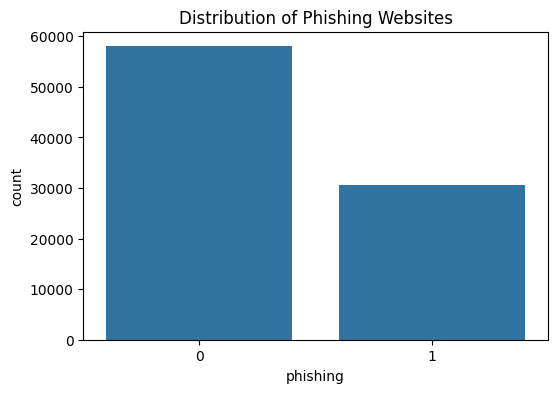

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='phishing', data=df)
plt.title('Distribution of Phishing Websites')
plt.show()

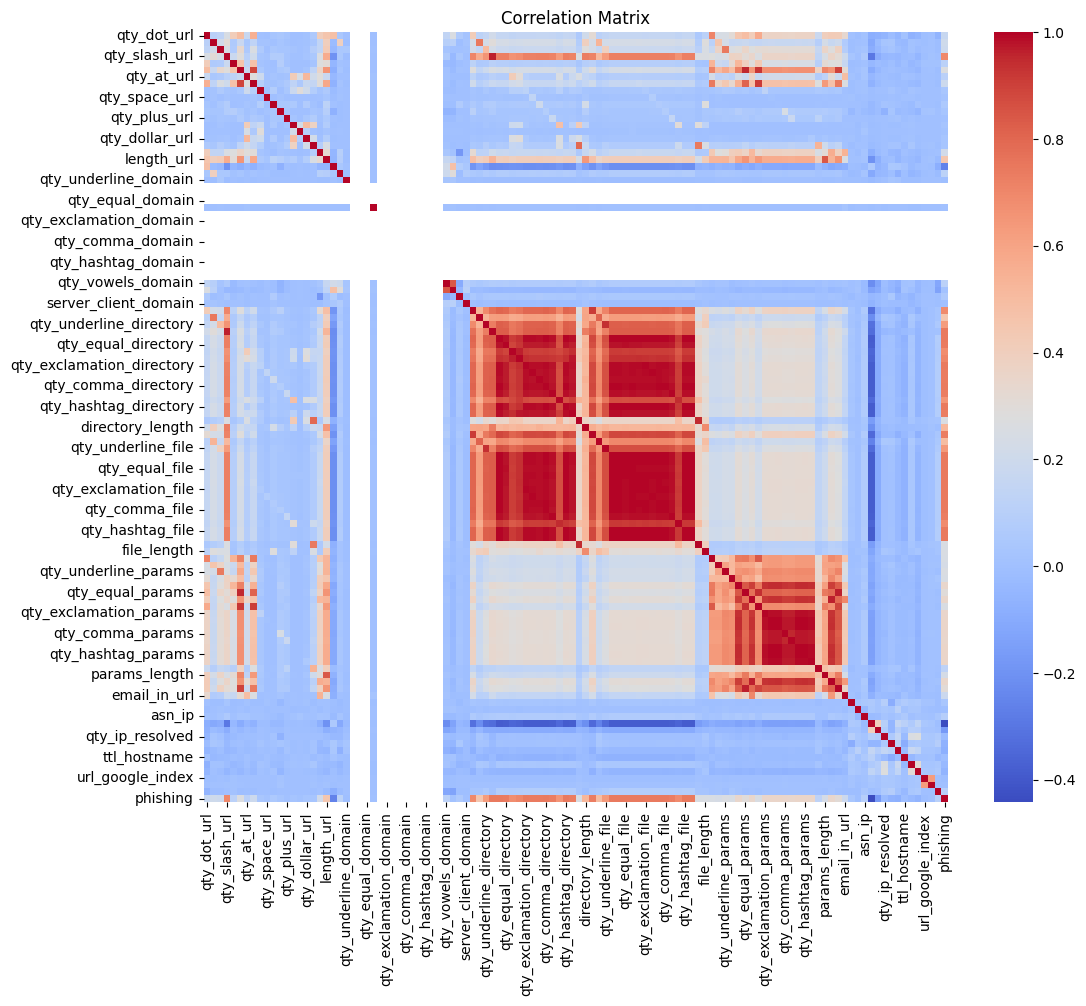

In [8]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# # Pairplot for a subset of features
# features_subset = ['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url', 'qty_params', 'phishing']
# sns.pairplot(df[features_subset], hue='phishing', diag_kind='kde')
# plt.suptitle('Pairplot of Selected Features')
# plt.show()

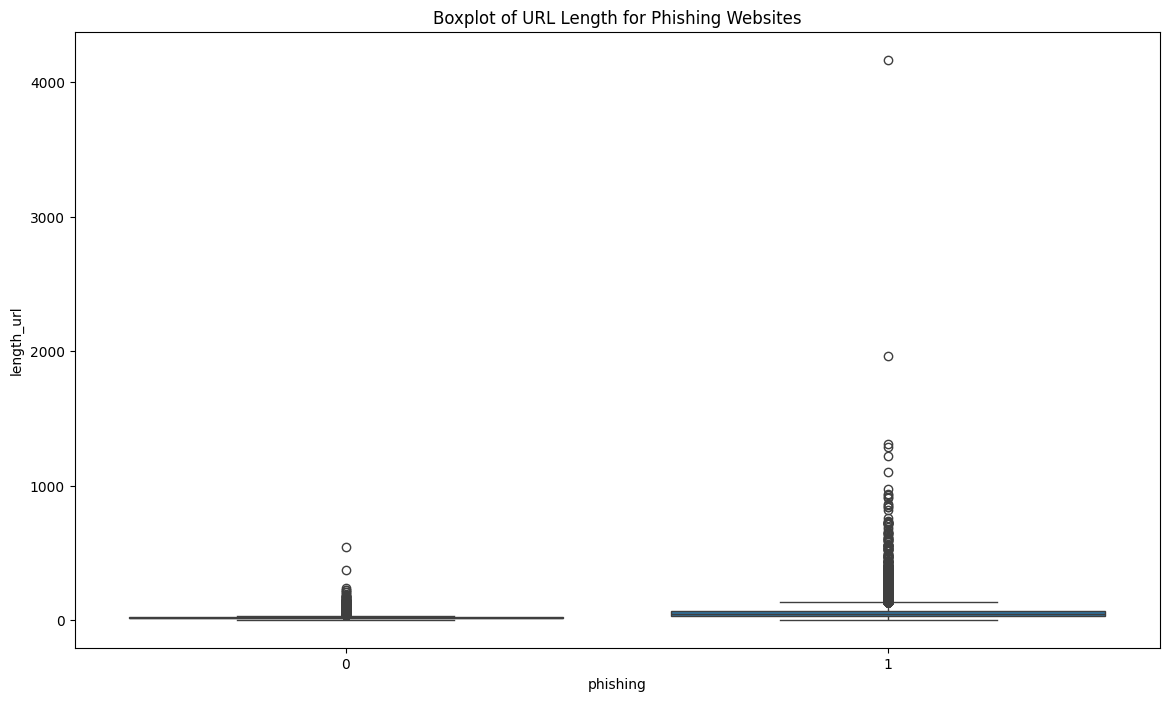

In [10]:
# Boxplot for selected features
plt.figure(figsize=(14, 8))
sns.boxplot(x='phishing', y='length_url', data=df)
plt.title('Boxplot of URL Length for Phishing Websites')
plt.show()

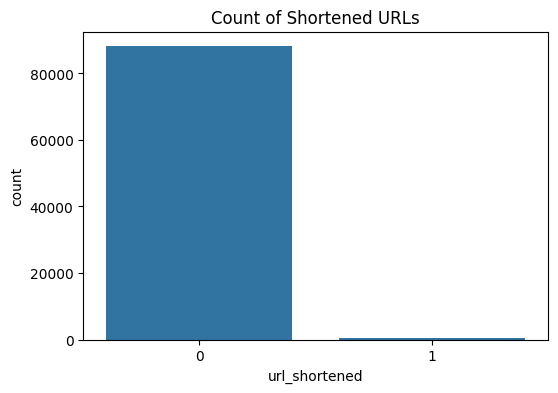

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='url_shortened', data=df)
plt.title('Count of Shortened URLs')
plt.show()

As we can see the data shows outliers as well as too many features may create a very complex model. We need to cater these issues.
First we will perform multiple analysis to gather final important features and then move onto outliers

Variance Thresholding

In [12]:
for x in df.columns:
   print(x, len(df[x].unique()))

qty_dot_url 23
qty_hyphen_url 30
qty_underline_url 22
qty_slash_url 25
qty_questionmark_url 6
qty_equal_url 20
qty_at_url 15
qty_and_url 21
qty_exclamation_url 10
qty_space_url 8
qty_tilde_url 6
qty_comma_url 8
qty_plus_url 10
qty_asterisk_url 18
qty_hashtag_url 7
qty_dollar_url 10
qty_percent_url 52
qty_tld_url 9
length_url 453
qty_dot_domain 19
qty_hyphen_domain 12
qty_underline_domain 4
qty_slash_domain 1
qty_questionmark_domain 1
qty_equal_domain 1
qty_at_domain 2
qty_and_domain 1
qty_exclamation_domain 1
qty_space_domain 1
qty_tilde_domain 1
qty_comma_domain 1
qty_plus_domain 1
qty_asterisk_domain 1
qty_hashtag_domain 1
qty_dollar_domain 1
qty_percent_domain 1
qty_vowels_domain 42
domain_length 94
domain_in_ip 2
server_client_domain 2
qty_dot_directory 16
qty_hyphen_directory 24
qty_underline_directory 18
qty_slash_directory 20
qty_questionmark_directory 2
qty_equal_directory 7
qty_at_directory 13
qty_and_directory 14
qty_exclamation_directory 9
qty_space_directory 9
qty_tilde_dir

In [13]:
for col in df.columns:
    fraction_unique = df[col].unique().shape[0] / df.shape[0]
    if fraction_unique > 0.5:
        print(col)

time_response


We should have dropped the column but it is important in the context of domain so we will skip dropping it.

In [14]:
# Assuming 'df' is your DataFrame
unique_counts = df.nunique()
top_10_columns = unique_counts.sort_values(ascending=False).head(10)

print("Top 10 columns with most unique values:")
print(top_10_columns)


Top 10 columns with most unique values:
time_response             80207
ttl_hostname              10171
time_domain_activation     8790
asn_ip                     3638
time_domain_expiration     3093
length_url                  453
params_length               354
directory_length            239
file_length                 168
domain_length                94
dtype: int64


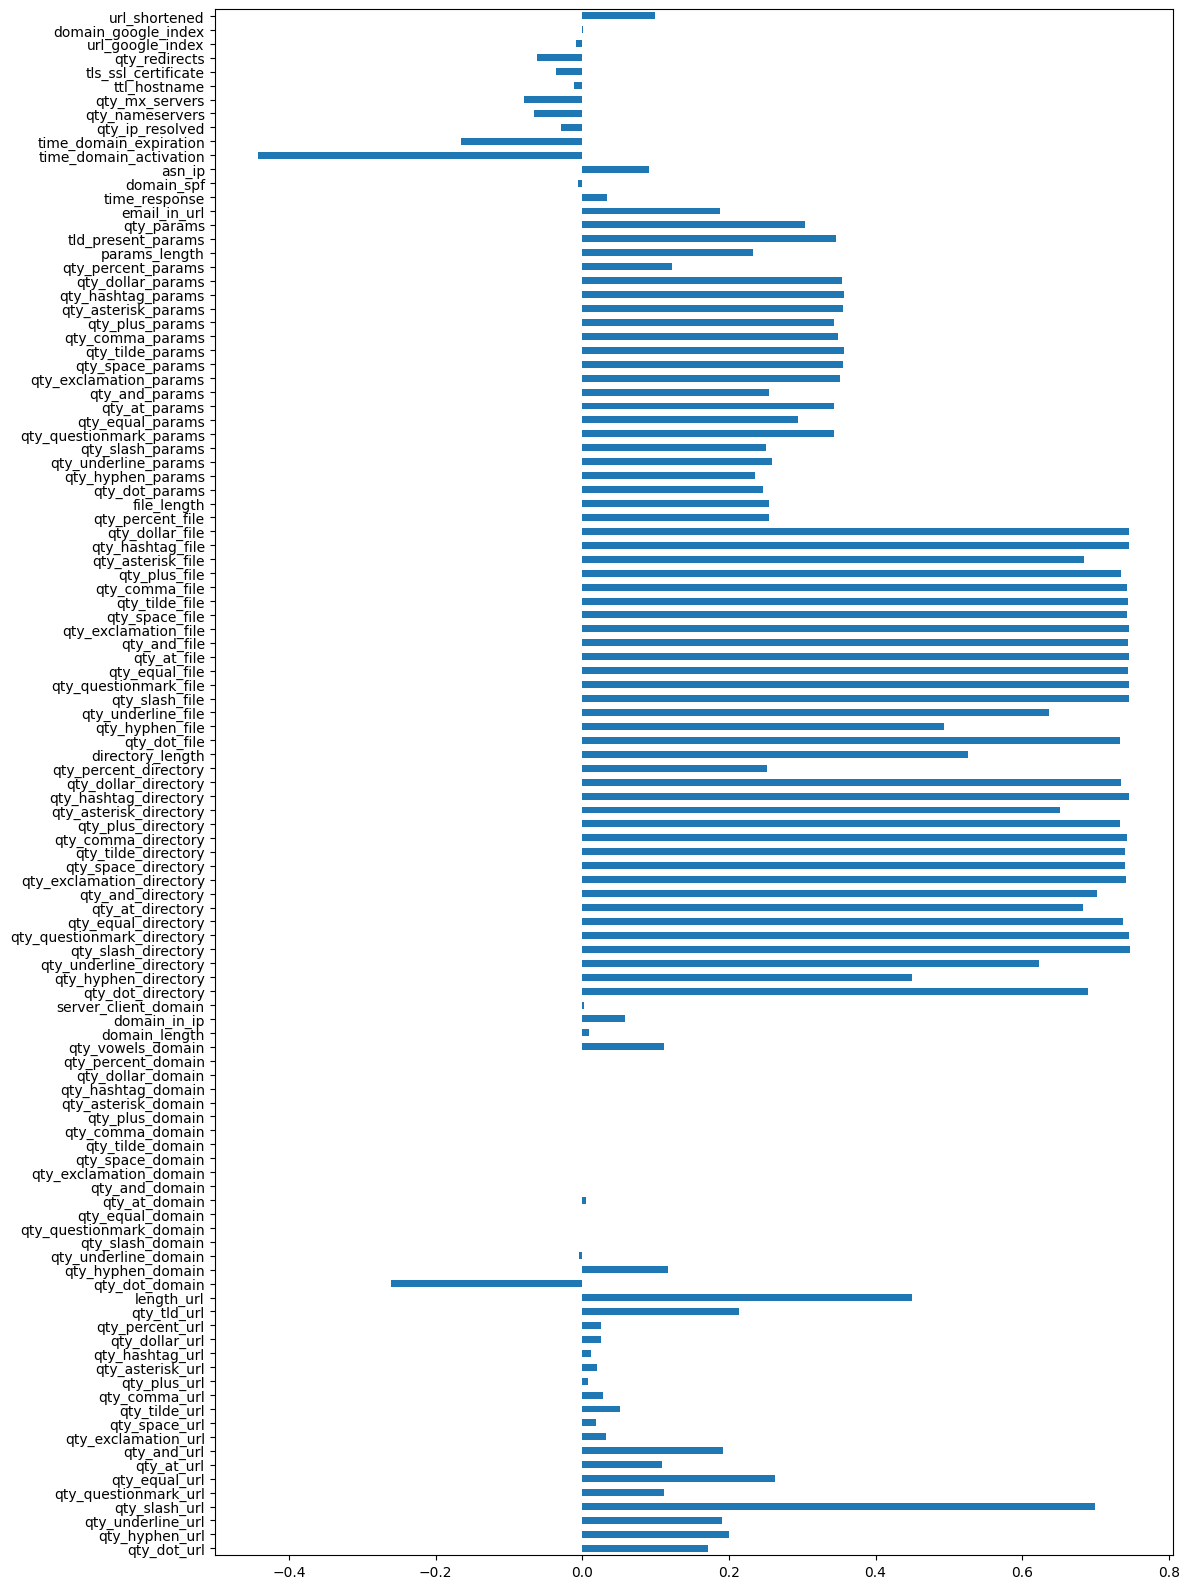

In [15]:
plt.figure(figsize = (12, 16))
df.corr().loc['phishing'][:-1].plot.barh()
plt.tight_layout()

In [16]:
categorical_columns = ['email_in_url','domain_in_ip','server_client_domain','tld_present_params','domain_spf','tls_ssl_certificate','url_google_index','domain_google_index','url_shortened'] #,
time_length = ['time_response','time_domain_activation','time_domain_expiration','length_url','domain_length','directory_length','file_length','params_length']
high_ct = ['ttl_hostname','asn_ip']
# time_response             80207
# ttl_hostname              10171
# time_domain_activation     8790
# asn_ip                     3638
# time_domain_expiration     3093
cols = categorical_columns + time_length

In [28]:
len(cols) + 2

19

Insights from the Features:
Positively correlated metrics phishing outcome was significantly affected by it.
Little or no correlation shows that there are many features not affecting the dataset.
Negative correlation shows inverse effect on the phishing data.

Statistical significance from the correlation:

In [17]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Flatten the correlation matrix and calculate the mean
mean_correlation = correlation_matrix.unstack().mean()
median_correlation = correlation_matrix.unstack().median()

print(f"Mean Correlation: {mean_correlation:.4f}")
print(f"Median Correlation: {median_correlation:.4f}")

Mean Correlation: 0.2237
Median Correlation: 0.0724


## Remove the domain important columns from dropping and perform inter correlation between the columns.

In [18]:
copy_df = df.drop(cols,axis=1)
copy_df.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_dollar_params,qty_percent_params,qty_params,asn_ip,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,qty_redirects,phishing
0,3,0,0,1,0,0,0,0,0,0,...,-1,-1,-1,60781,1,2,0,892,0,1
1,5,0,1,3,0,3,0,2,0,0,...,0,0,3,36024,1,2,1,9540,0,1
2,2,0,0,1,0,0,0,0,0,0,...,-1,-1,-1,4766,1,2,3,589,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,-1,-1,20454,1,2,0,292,0,1
4,2,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,53831,1,2,1,3597,1,0


In [19]:
from scipy.stats import pearsonr
from pandas.api.types import is_numeric_dtype

significant_columns = []

for col in copy_df.columns[:-1]:  # Exclude the target variable
    if is_numeric_dtype(copy_df[col]):
        correlation, pvalue = pearsonr(copy_df[col], copy_df['phishing'])
        print(f'{col: <40}: {correlation : .4f}, p-value: {pvalue : .4f}')

        # Check significance based on the p-value
        if pvalue <= 0.05 and np.abs(correlation) > mean_correlation:
            significant_columns.append(col)

# Keep only significant columns in the DataFrame
copy_df = copy_df[significant_columns + ['phishing']]


qty_dot_url                             :  0.1711, p-value:  0.0000
qty_hyphen_url                          :  0.2004, p-value:  0.0000
qty_underline_url                       :  0.1912, p-value:  0.0000
qty_slash_url                           :  0.6991, p-value:  0.0000
qty_questionmark_url                    :  0.1117, p-value:  0.0000
qty_equal_url                           :  0.2626, p-value:  0.0000
qty_at_url                              :  0.1087, p-value:  0.0000
qty_and_url                             :  0.1920, p-value:  0.0000
qty_exclamation_url                     :  0.0328, p-value:  0.0000
qty_space_url                           :  0.0192, p-value:  0.0000
qty_tilde_url                           :  0.0510, p-value:  0.0000
qty_comma_url                           :  0.0286, p-value:  0.0000
qty_plus_url                            :  0.0080, p-value:  0.0166
qty_asterisk_url                        :  0.0207, p-value:  0.0000
qty_hashtag_url                         :  0.011

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


qty_at_domain                           :  0.0046, p-value:  0.1689
qty_and_domain                          :  nan, p-value:  nan
qty_exclamation_domain                  :  nan, p-value:  nan
qty_space_domain                        :  nan, p-value:  nan
qty_tilde_domain                        :  nan, p-value:  nan
qty_comma_domain                        :  nan, p-value:  nan
qty_plus_domain                         :  nan, p-value:  nan
qty_asterisk_domain                     :  nan, p-value:  nan
qty_hashtag_domain                      :  nan, p-value:  nan
qty_dollar_domain                       :  nan, p-value:  nan
qty_percent_domain                      :  nan, p-value:  nan
qty_vowels_domain                       :  0.1113, p-value:  0.0000
qty_dot_directory                       :  0.6903, p-value:  0.0000
qty_hyphen_directory                    :  0.4493, p-value:  0.0000
qty_underline_directory                 :  0.6231, p-value:  0.0000
qty_slash_directory                     

In [20]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [21]:
len(copy_df.columns)

55

Saving the data to a csv file to upload to Astra DB.

In [30]:
columns = list(copy_df.columns[:-1]) + time_length + high_ct + categorical_columns
df_astra = df[columns]
df_astra.head()

,qty_slash_url,qty_equal_url,qty_dot_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,asn_ip,email_in_url,domain_in_ip,server_client_domain,tld_present_params,domain_spf,tls_ssl_certificate,url_google_index,domain_google_index,url_shortened
0,1,0,2,1,0,0,1,0,0,0,...,60781,0,0,0,-1,0,0,0,0,0
1,3,3,2,3,0,0,3,0,0,0,...,36024,0,0,0,0,-1,1,0,0,0
2,1,0,2,0,0,0,1,0,0,0,...,4766,0,0,0,-1,0,1,0,0,0
3,5,0,2,2,0,2,5,0,0,0,...,20454,0,0,0,-1,0,1,0,0,0
4,0,0,2,-1,-1,-1,-1,-1,-1,-1,...,53831,0,0,0,-1,0,0,0,0,0


In [ ]:
df

In [31]:
list(df_astra.columns)

['qty_slash_url',
 'qty_equal_url',
 'qty_dot_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_slash_params',
 'qty_questionmark_params',
 'qty_equal_params',
 'qty_at_params',
 'qty_and_params',
 'qty

In [33]:
csv_file_path = 'astra.csv'

# Use the to_csv method to convert and save the DataFrame to a CSV file
df_astra.to_csv(csv_file_path, index=False)

Start From Here for VScode

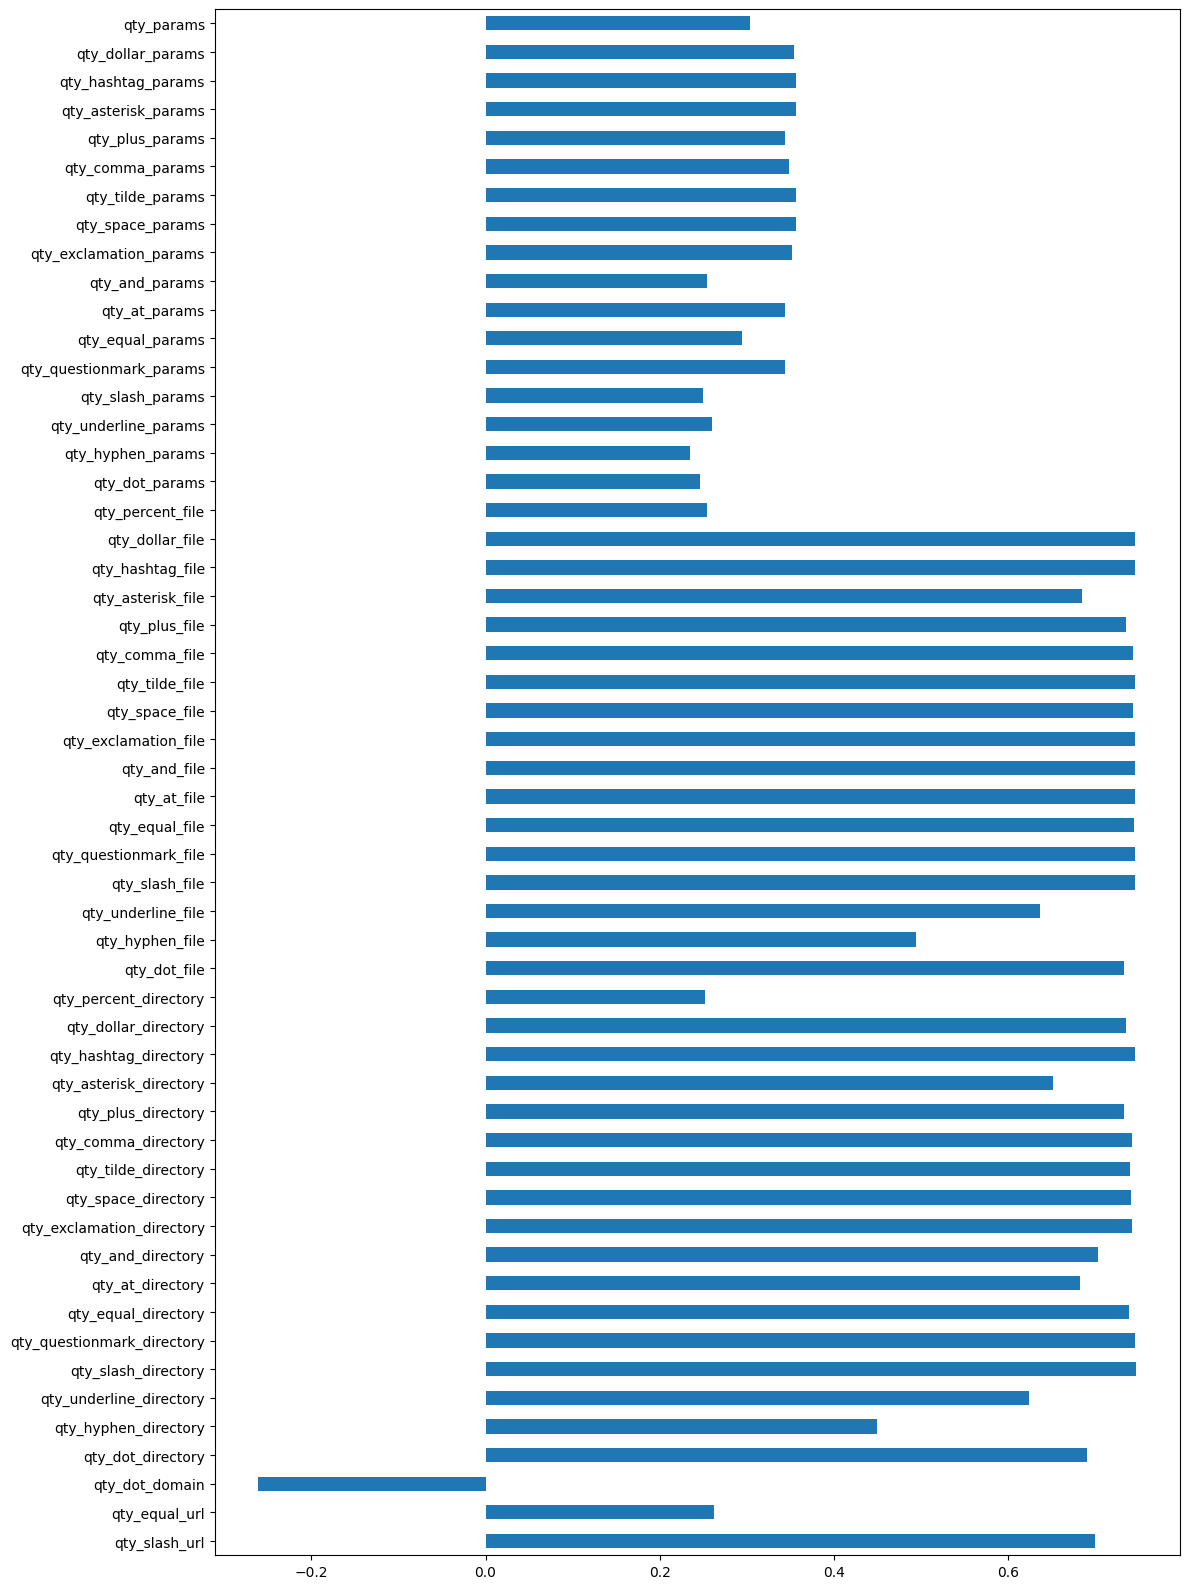

In [ ]:
plt.figure(figsize = (12, 16))
copy_df.corr().loc['phishing'][:-1].plot.barh()
plt.tight_layout()

Performing Inter Correlation between columns

In [ ]:

correlation_matrix = copy_df.corr()


correlation_threshold = 0.8


highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_pairs.append((feature_i, feature_j, correlation_matrix.iloc[i, j]))

# Step 4: Print or visualize highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]}: {pair[2]:.4f}")

# Step 5: Remove one feature from each correlated pair
features_to_remove = set()

for feature_i, feature_j, correlation_value in highly_correlated_pairs:
    # Choose the feature to remove based on your criteria
    # For example, remove the one with lower correlation with the target
    if abs(correlation_matrix.loc['phishing', feature_i]) > abs(correlation_matrix.loc['phishing', feature_j]):
        features_to_remove.add(feature_j)
    else:
        features_to_remove.add(feature_i)

# Step 6: Drop the features outside the loop
copy_df.drop(features_to_remove, axis=1, inplace=True)


Correlation between qty_slash_url and qty_slash_directory: 0.9636
Correlation between qty_equal_url and qty_equal_params: 0.9501
Correlation between qty_equal_url and qty_and_params: 0.9235
Correlation between qty_equal_url and qty_params: 0.8941
Correlation between qty_dot_directory and qty_questionmark_directory: 0.8080
Correlation between qty_dot_directory and qty_exclamation_directory: 0.8020
Correlation between qty_dot_directory and qty_space_directory: 0.8015
Correlation between qty_dot_directory and qty_tilde_directory: 0.8019
Correlation between qty_dot_directory and qty_comma_directory: 0.8091
Correlation between qty_dot_directory and qty_hashtag_directory: 0.8080
Correlation between qty_dot_directory and qty_dot_file: 0.9153
Correlation between qty_dot_directory and qty_slash_file: 0.8080
Correlation between qty_dot_directory and qty_questionmark_file: 0.8080
Correlation between qty_dot_directory and qty_equal_file: 0.8050
Correlation between qty_dot_directory and qty_at_file

In [ ]:
len(copy_df.columns)

9

In [ ]:
copy_df.head()

,qty_dot_domain,qty_slash_directory,qty_hyphen_file,qty_percent_file,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_hashtag_params,phishing
0,2,1,0,0,-1,-1,-1,-1,1
1,2,3,0,0,0,1,0,0,1
2,2,1,0,0,-1,-1,-1,-1,0
3,2,5,0,0,-1,-1,-1,-1,1
4,2,-1,-1,-1,-1,-1,-1,-1,0


In [ ]:
copy_df.columns[:-1]

Index(['qty_dot_domain', 'qty_slash_directory', 'qty_hyphen_file',
       'qty_percent_file', 'qty_hyphen_params', 'qty_underline_params',
       'qty_slash_params', 'qty_hashtag_params'],
      dtype='object')

In [ ]:
columns = list(copy_df.columns[:-1]) + time_length
df1 = df[columns]
df1.head()

,qty_dot_domain,qty_slash_directory,qty_hyphen_file,qty_percent_file,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_hashtag_params,time_response,time_domain_activation,time_domain_expiration,length_url,domain_length,directory_length,file_length,params_length
0,2,1,0,0,-1,-1,-1,-1,0.207316,-1,-1,25,17,8,7,-1
1,2,3,0,0,0,1,0,0,0.499566,579,150,223,16,42,9,165
2,2,1,0,0,-1,-1,-1,-1,0.935901,-1,-1,15,14,1,0,-1
3,2,5,0,0,-1,-1,-1,-1,0.410021,-1,-1,81,19,62,9,-1
4,2,-1,-1,-1,-1,-1,-1,-1,0.410761,6998,306,19,19,-1,-1,-1


Now we move onto outliers.

In [ ]:
from sklearn.ensemble import IsolationForest

# Set a threshold for outliers
outlier_threshold = 0.05  # Adjust based on your data

# Iterate over columns
for column in df1.columns:
    # Extract the column for isolation forest
    X = df1[column].values.reshape(-1, 1)

    # Initialize the Isolation Forest model
    isolation_forest = IsolationForest(contamination=outlier_threshold, random_state=42)

    # Fit the model
    isolation_forest.fit(X)

    # Predict outliers (anomalies)
    outliers = isolation_forest.predict(X)

    # Replace outliers with the median value of the column
    median_value = df1[column].median()
    df1.loc[outliers == -1, column] = median_value


Experiment with zscore outlier detection


In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming your dataset is in a Pandas DataFrame called 'df'

# # Set a threshold for unique values
# unique_values_threshold = 10

# # Iterate over columns
# for column in df.columns:
#     if df[column].nunique() > unique_values_threshold and np.issubdtype(df[column].dtype, np.number):
#         # Identify outliers using Z-score
#         z_scores = (df[column] - df[column].mean()) / df[column].std()
#         outliers = (np.abs(z_scores) > 3)

#         # Replace outliers with the median value
#         median_value = df[column].median()
#         df.loc[outliers, column] = median_value


In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming your dataset is in a Pandas DataFrame called 'df'

# # Set a threshold for unique values
# unique_values_threshold = 10

# # Iterate over columns
# for column in df.columns:
#     if df[column].nunique() > unique_values_threshold and np.issubdtype(df[column].dtype, np.number):
#         # Identify outliers using Z-score
#         z_scores = (df[column] - df[column].mean()) / df[column].std()
#         outliers = (np.abs(z_scores) > 3)

#         # Replace outliers with the median value
#         median_value = df[column].median()
#         df.loc[outliers, column] = median_value


See the change!


In [ ]:
df_selected = df[categorical_columns + high_ct + ['phishing']]

df_final = pd.concat([df1, df_selected], axis=1)
df_final.head()

,qty_dot_domain,qty_slash_directory,qty_hyphen_file,qty_percent_file,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_hashtag_params,time_response,time_domain_activation,...,server_client_domain,tld_present_params,domain_spf,tls_ssl_certificate,url_google_index,domain_google_index,url_shortened,ttl_hostname,asn_ip,phishing
0,2,1,0,0,-1,-1,-1,-1,0.207316,-1,...,0,-1,0,0,0,0,0,892,60781,1
1,2,3,0,0,0,-1,0,0,0.499566,579,...,0,0,-1,1,0,0,0,9540,36024,1
2,2,1,0,0,-1,-1,-1,-1,0.935901,-1,...,0,-1,0,1,0,0,0,589,4766,0
3,2,5,0,0,-1,-1,-1,-1,0.410021,-1,...,0,-1,0,1,0,0,0,292,20454,1
4,2,-1,-1,-1,-1,-1,-1,-1,0.410761,6998,...,0,-1,0,0,0,0,0,3597,53831,0


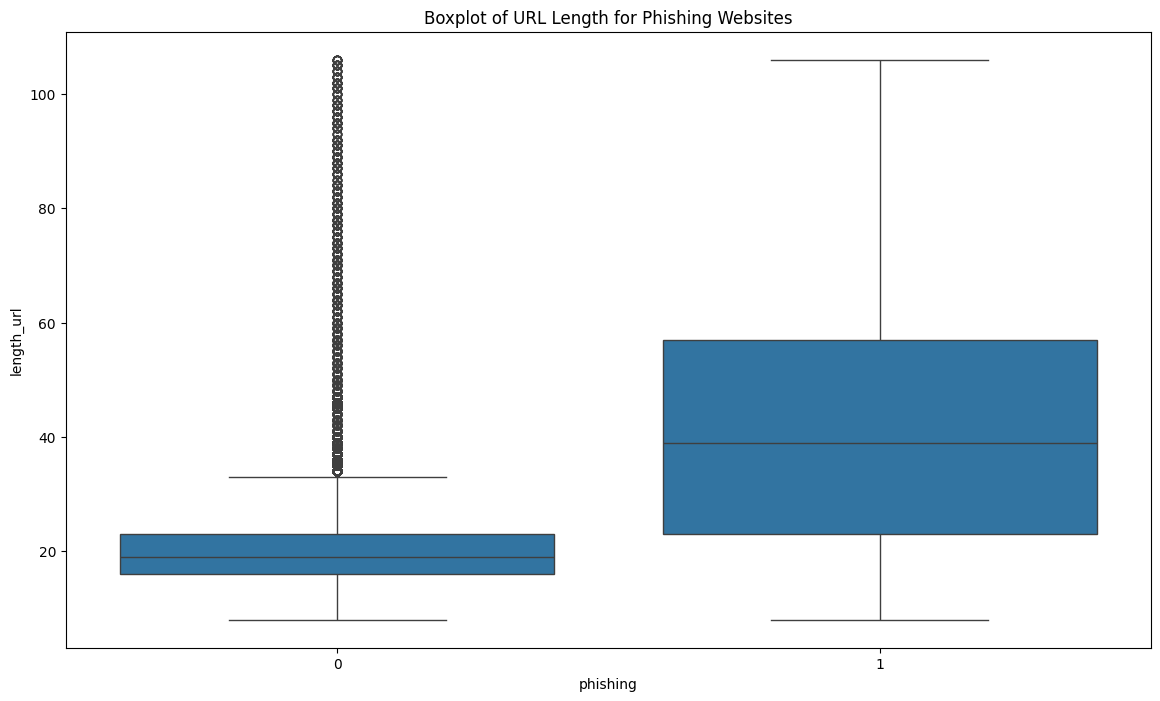

In [ ]:
# Boxplot for selected features
plt.figure(figsize=(14, 8))
sns.boxplot(x='phishing', y='length_url', data=df_final)
plt.title('Boxplot of URL Length for Phishing Websites')
plt.show()

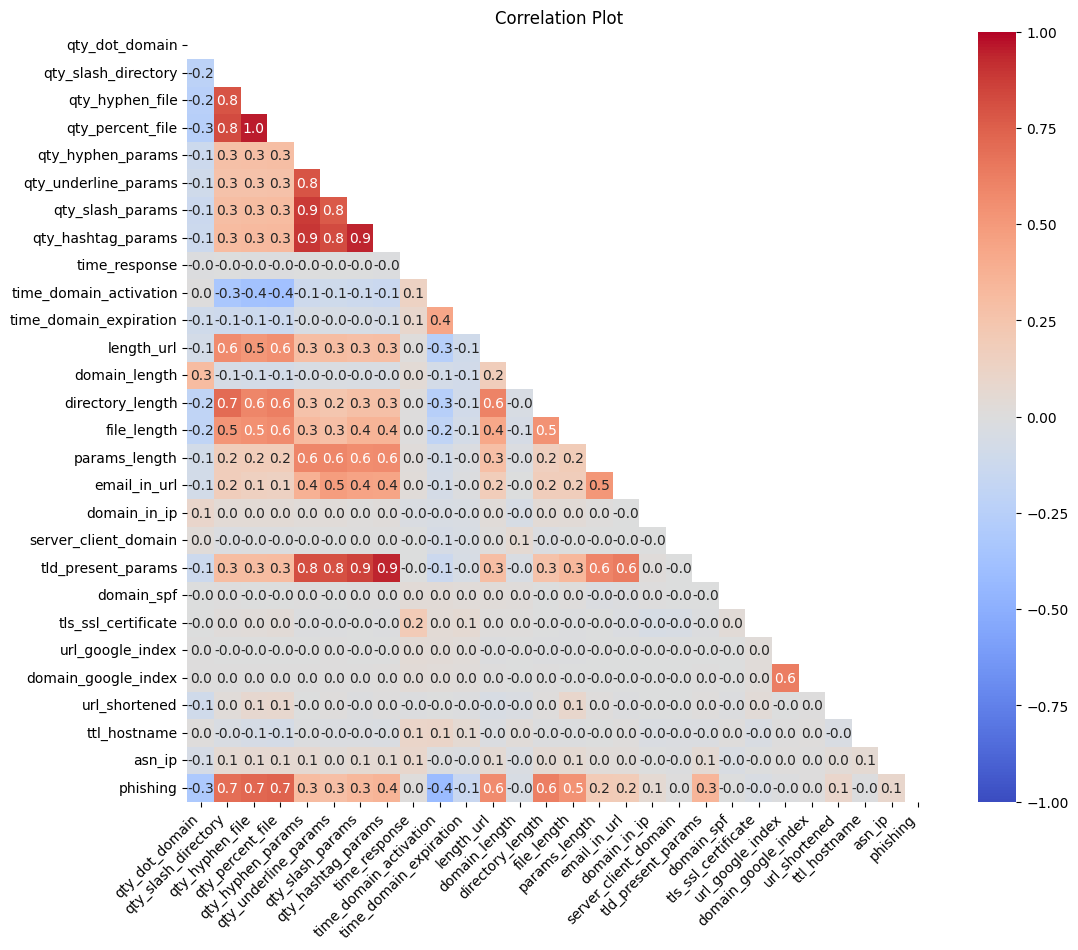

In [ ]:
correlation_matrix = df_final.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, annot=True, fmt=".1f")
plt.title('Correlation Plot')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df_final['qty_slash_directory'].value_counts()

-1    50650
 1    13858
 3     8388
 2     8153
 4     4631
 5     2967
Name: qty_slash_directory, dtype: int64

In [ ]:
df_final.columns

Index(['qty_dot_domain', 'qty_slash_directory', 'qty_hyphen_file',
       'qty_percent_file', 'qty_hyphen_params', 'qty_underline_params',
       'qty_slash_params', 'qty_hashtag_params', 'time_response',
       'time_domain_activation', 'time_domain_expiration', 'length_url',
       'domain_length', 'directory_length', 'file_length', 'params_length',
       'email_in_url', 'domain_in_ip', 'server_client_domain',
       'tld_present_params', 'domain_spf', 'tls_ssl_certificate',
       'url_google_index', 'domain_google_index', 'url_shortened',
       'ttl_hostname', 'asn_ip', 'phishing'],
      dtype='object')

Move onto modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Install the missing module
#!pip install scikit-learn==1.3.0


In [ ]:
numeric_cols = list(df1.columns)
qty = ['qty_dot_domain', 'qty_slash_directory', 'qty_hyphen_file',
       'qty_percent_file', 'qty_hyphen_params', 'qty_underline_params',
       'qty_slash_params', 'qty_hashtag_params']
catqty = categorical_columns + qty

numeric_cols = [col for col in numeric_cols if col not in qty]
numeric_cols

['time_response',
 'time_domain_activation',
 'time_domain_expiration',
 'length_url',
 'domain_length',
 'directory_length',
 'file_length',
 'params_length']

Normalizing the data distributions

In [ ]:
from scipy.stats import yeojohnson

for x in numeric_cols:
  df_final[x], _ = yeojohnson(df_final[x])

In [ ]:
X = df_final.drop(labels=['phishing'],axis=1)
y = df_final["phishing"]

In [ ]:
num_pipeline=Pipeline(
    steps=[
        ("scaler",StandardScaler())
    ]
)
cat_pipeline=Pipeline(

    steps=[
        ("onehotencoder",OneHotEncoder())

    ]
)


In [ ]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,numeric_cols),
        ("cat_pipeline",cat_pipeline,catqty)
    ]
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
preprocessor.fit_transform(X_train)
preprocessor.transform(X_test)

array([[-2.40450683,  1.06098759, -1.37653906, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04154023,  0.83555098,  0.58647968, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.07228413, -0.65404739,  0.34382381, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.3486407 ,  0.28221031,  1.76676472, ...,  0.        ,
         1.        ,  0.        ],
       [-2.40450683,  0.53245747,  0.76546896, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.85394566,  0.55081077,  0.51985725, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train.head()

,qty_dot_domain,qty_slash_directory,qty_hyphen_file,qty_percent_file,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_hashtag_params,time_response,time_domain_activation,...,domain_in_ip,server_client_domain,tld_present_params,domain_spf,tls_ssl_certificate,url_google_index,domain_google_index,url_shortened,ttl_hostname,asn_ip
14277,2,-1,-1,-1,-1,-1,-1,-1,1.389267,35.584911,...,0,0,-1,0,0,0,0,0,591,27647
84405,3,-1,0,0,0,0,0,0,0.612562,-1.340074,...,0,0,1,0,0,0,0,0,21596,11664
41699,2,-1,-1,-1,-1,-1,-1,-1,0.564501,34.156221,...,0,0,-1,0,0,0,0,0,7198,27647
23979,2,-1,-1,-1,-1,-1,-1,-1,1.315379,-1.340074,...,0,0,-1,0,0,0,0,0,590,26496
59132,1,1,0,0,-1,-1,-1,-1,0.658274,-1.340074,...,0,0,-1,0,0,0,0,1,1002,16509


In [ ]:
encoder = TargetEncoder(target_type='binary')
X_train_encoded = encoder.fit_transform(X_train[['ttl_hostname', 'asn_ip']], y_train)

# Transform the test data using the encoder
X_test_encoded = encoder.transform(X_test[['ttl_hostname', 'asn_ip']])

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [ ]:
X_train[['ttl_hostname', 'asn_ip']] = X_train_encoded
X_test[['ttl_hostname', 'asn_ip']] = X_test_encoded

In [ ]:
X_train.sample(5)

,num_pipeline__time_response,num_pipeline__time_domain_activation,num_pipeline__time_domain_expiration,num_pipeline__length_url,num_pipeline__domain_length,num_pipeline__directory_length,num_pipeline__file_length,num_pipeline__params_length,cat_pipeline__email_in_url_0,cat_pipeline__email_in_url_1,...,cat_pipeline__qty_hyphen_params_-1,cat_pipeline__qty_hyphen_params_0,cat_pipeline__qty_underline_params_-1,cat_pipeline__qty_underline_params_0,cat_pipeline__qty_slash_params_-1,cat_pipeline__qty_slash_params_0,cat_pipeline__qty_hashtag_params_-1,cat_pipeline__qty_hashtag_params_0,ttl_hostname,asn_ip
4985,-0.326028,-0.080615,-0.570540,1.709333,2.209489,1.563128,0.616952,-0.190726,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.742607
27307,-0.462513,-1.499649,-1.376539,-0.163710,0.436792,0.458045,0.616952,-0.190726,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.346501,0.932745
21511,-0.260590,-0.469997,0.785331,0.802932,-0.398369,1.366463,0.616952,-0.190726,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.901077,0.438562
40649,-0.179633,0.911601,0.641499,1.626233,0.982848,1.583438,0.616952,-0.190726,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.202543,0.925389
14716,0.457761,0.975404,-0.718827,-0.970704,-0.631599,-0.811605,-0.795296,-0.190726,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.177063,0.004154


In [ ]:
#!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.8 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
models={

    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'CatBoostClassifier':CatBoostClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [ ]:
trained_model_list=[]
model_list=[]
acc_list=[]

In [ ]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)


LogisticRegression()
RandomForestClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
def evaluate_model(true,pred):
    acc=accuracy_score(true,pred)
    roc=roc_auc_score(true,pred)

    return acc

In [ ]:
for i in range(len(list(models))):
    model=list(models.values())[i]

    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    acc=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("Accuracy:", acc)

    acc_list.append(acc)

    print("="*40)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model training performance LogisticRegression()
Accuracy: 0.9278059785673999


model training performance RandomForestClassifier()
Accuracy: 0.9637149840195526


Learning rate set to 0.06004
0:	learn: 0.5848136	total: 18.6ms	remaining: 18.6s
1:	learn: 0.5020895	total: 36.9ms	remaining: 18.4s
2:	learn: 0.4409426	total: 56ms	remaining: 18.6s
3:	learn: 0.3867882	total: 74.7ms	remaining: 18.6s
4:	learn: 0.3449429	total: 98.2ms	remaining: 19.5s
5:	learn: 0.3183202	total: 116ms	remaining: 19.2s
6:	learn: 0.2928127	total: 135ms	remaining: 19.2s
7:	learn: 0.2721629	total: 154ms	remaining: 19.1s
8:	learn: 0.2585876	total: 172ms	remaining: 18.9s
9:	learn: 0.2462058	total: 189ms	remaining: 18.7s
10:	learn: 0.2334614	total: 208ms	remaining: 18.7s
11:	learn: 0.2232516	total: 227ms	remaining: 18.7s
12:	learn: 0.2168645	total: 245ms	remaining: 18.6s
13:	learn: 0.2077299	total: 263ms	remaining: 18.5s
14:	learn: 0.2018045	total: 281ms	remaining: 18.4s
15:	learn: 0.1965378	total: 302ms	remaining: 18.6s


In [ ]:
max(acc_list)

0.9655574356081971